# Assignment 4 : Predict Blood Donations

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus. <br>
Data is courtesy of Yeh, I-Cheng via the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center).

The dataset contains the following variables:
* Months since Last Donation: this is the number of monthis since this donor's most recent donation.
* Number of Donations: this is the total number of donations that the donor has made.
* Total Volume Donated: this is the total amound of blood that the donor has donated in cubuc centimeters.
* Months since First Donation: this is the number of months since the donor's first donation.

Your goal is to predict the last column, which is whether the donor donated blood in March 2007.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1-1 load the "transfusion.data" dataset into a dataframe variable called df. Print the shape, head of df

In [2]:
df = pd.read_csv("transfusion.data")

print(df.shape)
print(df.head())

(748, 5)
   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0  


1-2 Rename df columns to the following: `['Recency', 'Frequency', 'Volume', 'Time', 'Target']`, then print some info about df

In [3]:
df.columns = ["Recency","Frequency","Volume","Time","Target"]

print(df.shape)
print(df.describe())

(748, 5)
          Recency   Frequency        Volume        Time      Target
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.514706   1378.676471   34.282086    0.237968
std      8.095396    5.839307   1459.826781   24.376714    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50.000000    0.000000
max     74.000000   50.000000  12500.000000   98.000000    1.000000


## Data Exploration

2- Plot a **bar plot** of the column **Target** (% of each class). How much accuracy can you get if prediction is always equal to "*0*" ?

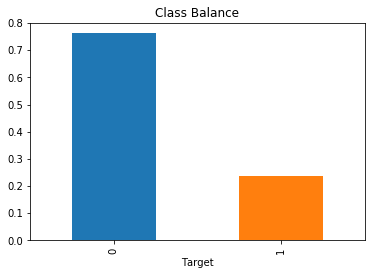

In [4]:
(df.groupby('Target').size()/len(df["Target"])).plot(kind="bar",title="Class Balance")


In [5]:
naive_pred = (len(df["Target"]) - df["Target"].sum()) / len(df["Target"])
print("naive prediction of 0: ",naive_pred,"%")

naive prediction of 0:  0.7620320855614974 %


3-1 Print the [Correlation matrix](https://en.wikipedia.org/wiki/Correlation_and_dependence#Correlation_matrices) of df.

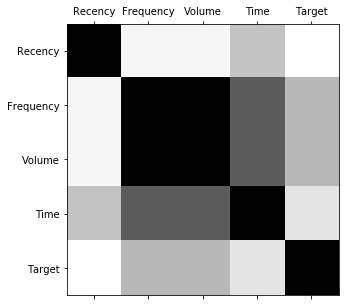

In [6]:
# your code here
corr = df.corr()
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(corr,cmap='Greys')
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

3-2 Which are the 2 most correlated variables, make a scatter plot of them. Could you guess how much blood is donated each time ?

Frequency and volume are very heavily correlated, this is likely due to the fact that you mostly give the same amount of blood each time

there is indeed a linear relationship between frequency and volume


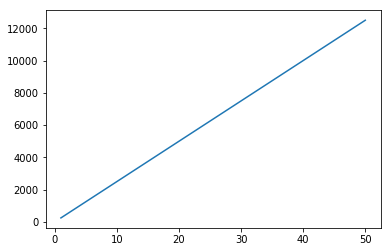

In [7]:
plt.plot(df["Frequency"],df["Volume"])
print('there is indeed a linear relationship between frequency and volume')

In [8]:
blood_per_donation = max(df.Volume)/max(df.Frequency)
print("A donor will always give",blood_per_donation,'CCs (1 cubic centimeters = 1 ml ) of bood per donation')

A donor will always give 250.0 CCs (1 cubic centimeters = 1 ml ) of bood per donation


3-3 Remove one of the two most correlated variables above. The choice should have no consequence for the rest, but to have the same results among all students, remove the column with the shortest name (small number of letters)

In [9]:
shortest_col = min(["Volume","Frequency"],key=len)

df.drop(shortest_col,axis=1,inplace=True)

## Model Training & Evaluation

4- Load the target variable into a dataframe and call it y. Then, load the features into a second dataframe and call it X. Fit a logistic model using cross validation. Use 5 folds and print the average accuracy

In [10]:
# your code here
y = df.Target
X = df.drop("Target",axis=1)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf_log = LogisticRegression(random_state=123,C=1,solver='lbfgs')
cv_model = cross_val_score(clf_log,X,y,cv=5,scoring='accuracy')


# your code here
scores_log = cv_model.mean()
print('cross validation accuracy =',scores_log) #R2 scoring not returning normal values (some were negative) for evaluating model performance

cross validation accuracy = 0.7727874720357942


5- Fit a RandomForestClassifier [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) using cross validation. Use 5 folds and print the average accuracy. <br>
Set random_state=1 and play around the other parameters manually to improve the score

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=1,max_depth=3)#, max_depth=2, min_samples_split=2 , min_samples_leaf=5)
scores_rf = cross_val_score(clf_rf,X,y,cv=5,scoring="accuracy")

print('cross validation accuracy =', scores_rf)

cross validation accuracy = [0.72       0.76       0.75333333 0.75838926 0.76510067]


C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\ensemble\forest

6- So far, you were told to leave all the parameters to default values, let's now optimize some of them using GridSearchCV. <br>
Search the following parameters in the given values (**This may take a while**):
* min_samples_leaf: [1, 4, 7]
* min_samples_split: [2, 4, 6, 8, 10]
* n_estimators: [20, 30, 40]
* max_depth: [2,3]

In [13]:
from sklearn.model_selection import GridSearchCV
params = {"min_samples_leaf": [1,4,7], "min_samples_split":list(range(2,10,2)),"n_estimators":list(range(20,40,10)),"max_depth":[2,3]}
clf_rf2 = RandomForestClassifier(random_state=1)
clf_gs = GridSearchCV(clf_rf2,params,scoring = 'accuracy',cv=5)

clf_gs.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [1, 4, 7], 'min_samples_split': [2, 4, 6, 8], 'n_estimators': [20, 30], 'max_depth': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

7- Print the best score, and the best parameters

In [14]:
print(clf_gs.best_score_)

0.7740641711229946


In [15]:
print(clf_gs.best_params_)

{'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 30}


8- Build a dataframe containing the importance of each feature. Sort it from the most important to the least one.

In [16]:
#first we need to fit the random classifier with the optimal parameters that we found above
clf_r3 = RandomForestClassifier(random_state=1,max_depth=3,min_samples_leaf=7,min_samples_split=2,n_estimators=30)

clf_r3.fit(X,y)

cv_score = cross_val_score(clf_r3,X,y,cv=5,scoring="accuracy")

print(cv_score.mean())

best_features = pd.DataFrame(clf_r3.feature_importances_)

print(best_features)


0.7740223713646532
          0
0  0.443683
1  0.372613
2  0.183705


9- **Feature engineering**: Try to improve the *RandomForestClassifier* by adding engineered features and using 5 fold grid search for parameter tuning. Print the best score and the best parameters.   
**Hint**: You can achieve 78,6 % accuracy or higher.

In [17]:
import math
print(df.columns)
print(df["Recency"].unique())


# does a one hot encoding for the time values but not for months but for each year
def stretch_time(col,df):
    max_years = math.ceil(max(df[col])/12)
    for year in range(1,max_years):
        new_col = col + "_" + str(year)
        df[new_col] = np.where(np.ceil(df[col]/12) == year,1,0)
    df.drop(col,axis=1,inplace=True)
    return df

#X_engineered = stretch_time("Time",X)
#X_engineered = stretch_time("Recency",X)  #doesnt help
#print(X_engineered.columns)

Index(['Recency', 'Frequency', 'Time', 'Target'], dtype='object')
[ 2  0  1  4  5  9  3 12  6 11 10 13  8 14  7 16 15 23 21 18 22 26 35 38
 40 74 20 17 25 39 72]


doing one-hot encoding with features turned out to be a dead end, indeed these columns have values which are not really "categorical" so doing this type of encoding turned out to be pointless.

Instead, we will create a new feature which is based on the features that we already have. We add the "average_donations" of a donor per year which will be a much stronger indicator of wether or not he will be likely to donate blood again.

In [18]:
#we create a new column by using already available data to create a more meaningfull columns
X_engineer2 = X
X_engineer2["Average_Donations"] = X_engineer2["Frequency"]/(X_engineer2["Time"]/12)

#new features, we need to redo a grid search
params = {"min_samples_leaf": [1,4], "min_samples_split":list(range(2,10,2)),"n_estimators":list(range(20,40,5)),"max_depth": list(range(2,4))}
clf_rf = RandomForestClassifier(random_state=1)
clf_gs = GridSearchCV(clf_rf2,params,scoring = 'accuracy',cv=5)

clf_gs.fit(X_engineer2,y)

print(clf_gs.best_params_)
print(clf_gs.best_score_)


{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}
0.786096256684492


    by adding this extra feature, we are able to reach the desired 78.6% accuracy

10- Always in the same setting (5 fold grid search), try different ensemble models from [sklearn](http://scikit-learn.org/stable/modules/ensemble.html#ensemble) in order to get the highest accuracy. Print the best score

Extra trees classifier

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

ext_tree = ExtraTreesClassifier()
#we use grid search again to find the optimal parmeters
ext_grid = GridSearchCV(ext_tree,params,scoring='accuracy',cv=5)
ext_grid.fit(X_engineer2,y)

print(ext_grid.best_params_)
print(ext_grid.best_score_)

{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 30}
0.767379679144385


using ada Boost classifier

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

adaB = AdaBoostClassifier(clf_rf,random_state=1)


X_train,X_test,y_train,y_test = train_test_split(X_engineer2,y,train_size=0.7)

adaB.fit(X_train,y_train)

C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: Th

C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\ensemble\forest

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=1)

improving the model further by using boosting methods

In [21]:
print(adaB.score(X_test,y_test))

0.72
